In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ruta='../datasets/Profile of Body Metrics and Fashion Colors.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=';')
df.shape

(25000, 7)

## 1. Descripción del Conjunto de Datos
* Breve descripción de cada conjunto de datos, incluyendo la fuente, el tamaño y las variables.

* Fuente: Este conjunto de datos sobre características físicas y de apariencia de personas, específicamente con medidas físicas como altura (en centímetros), peso (en kilogramos), y categorías relacionadas con su estado físico, como el índice de masa corporal (BMI). Además, incluye atributos sobre el color de la piel, ropa y pantalones, representados en formato RGB .
* Height (Centimeter): Altura en centímetros.
* Weight (Kilograms): Peso en kilogramos.
* Gender: Género de la persona (probablemente "Male" o "Female").
* BMI: Índice de Masa Corporal (Body Mass Index). Puede tener valores como "Underweight", "Ideal", "Overweight", etc.
* Skin Color: Color de piel, representado como un valor RGB (Red, Green, Blue).
* Clothes Color: Color de la ropa, representado también en formato RGB.
* Pants Color: Color de los pantalones, representado igualmente en formato RGB.

*Tamaño del Conjunto de Datos: Número de Filas: 25000 - Número de Columnas: 7

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Height(Centimeter)  25000 non-null  float64
 1   Weight(Kilograms)   25000 non-null  float64
 2   Gender              25000 non-null  object 
 3   BMI                 25000 non-null  object 
 4   Skin Color          25000 non-null  object 
 5   Clothes Color       25000 non-null  object 
 6   Pants Color         25000 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.3+ MB


## 2. Análisis Estadístico Descriptivo
* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.
* Analizar la distribución de las variables categóricas.

In [6]:
df.describe()

,Height(Centimeter),Weight(Kilograms)
count,25000.000000,25000.000000
mean,172.702509,57.642209
std,4.830264,5.289290
min,153.107034,35.386871
25%,169.429170,54.117461
50%,172.709078,57.677738
75%,175.953312,61.186318
max,190.888112,77.529759


In [12]:
# Visualización de los valores de "Clothes Color" y "Pants Color"
clothes_colors = df['Clothes Color'].apply(lambda x: f'RGB{str(x)}')
pants_colors = df['Pants Color'].apply(lambda x: f'RGB{str(x)}')

# Mostrar una muestra de Clothes Color y Pants Color
print(clothes_colors.head())
print(pants_colors.head())

0     RGB(19, 165, 16)
1    RGB(55, 238, 252)
2     RGB(58, 67, 207)
3     RGB(29, 140, 46)
4    RGB(200, 235, 99)
Name: Clothes Color, dtype: object
0     RGB(24, 212, 123)
1    RGB(101, 131, 136)
2      RGB(27, 41, 168)
3      RGB(71, 123, 25)
4    RGB(122, 118, 117)
Name: Pants Color, dtype: object


## 3. Visualizaciones:
* Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).
* Visualizar las correlaciones entre variables (mapa de calor de correlación).

/tmp/ipykernel_15701/2853269595.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


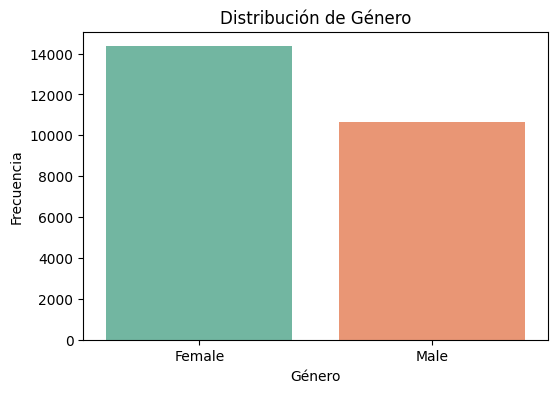

In [14]:
# Gráfico de barras para la distribución de "Gender"
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

/tmp/ipykernel_15701/2544116339.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BMI', data=df, palette='Set3')


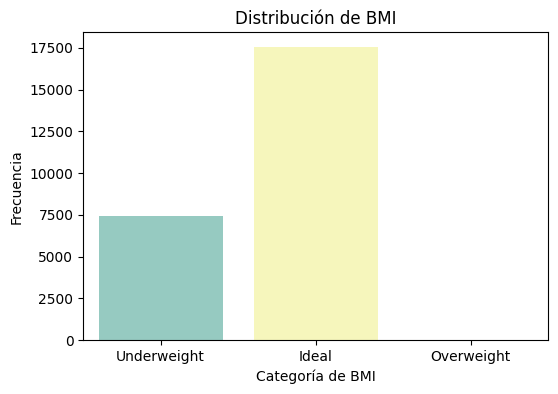

In [15]:
# Gráfico de barras para la distribución de "BMI"
plt.figure(figsize=(6, 4))
sns.countplot(x='BMI', data=df, palette='Set3')
plt.title('Distribución de BMI')
plt.xlabel('Categoría de BMI')
plt.ylabel('Frecuencia')
plt.show()

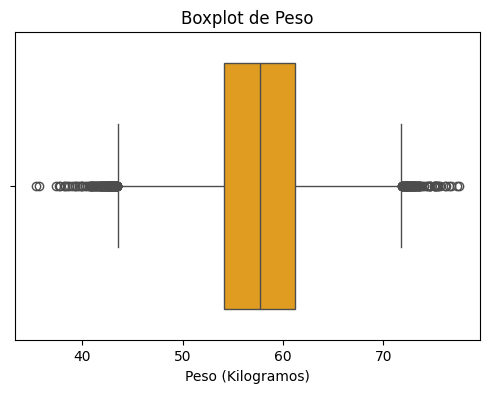

In [31]:
# Boxplot para "Weight (Kilograms)"
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Weight(Kilograms)'], color='orange')
plt.title('Boxplot de Peso')
plt.xlabel('Peso (Kilogramos)')
plt.show()


## 4. Identificación de Valores Nulos y Outliers
* Detectar valores nulos y discutir cómo podrían ser tratados.
* Identificar outliers y evaluar su impacto potencial en el análisis

In [17]:
df.isnull().sum()

Height(Centimeter)    0
Weight(Kilograms)     0
Gender                0
BMI                   0
Skin Color            0
Clothes Color         0
Pants Color           0
dtype: int64

In [18]:
# eliminamos las filas que contengan valores nulos en todas las columnas
df_cleaned = df.dropna(how='all')
df_cleaned.shape

(25000, 7)

In [19]:
df_cleaned.isnull().sum()

Height(Centimeter)    0
Weight(Kilograms)     0
Gender                0
BMI                   0
Skin Color            0
Clothes Color         0
Pants Color           0
dtype: int64

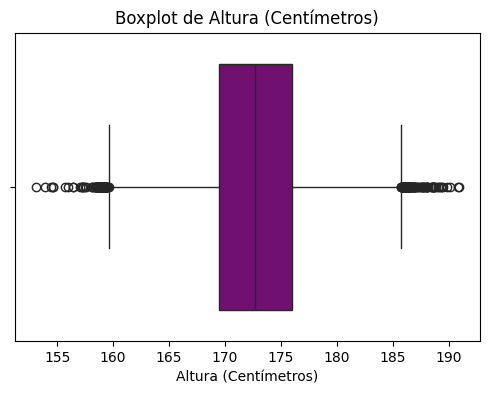

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Height(Centimeter)'], color='purple')
plt.title('Boxplot de Altura (Centímetros)')
plt.xlabel('Altura (Centímetros)')
plt.show()


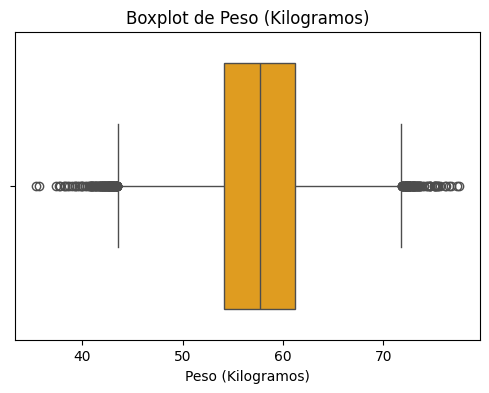

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Weight(Kilograms)'], color='orange')
plt.title('Boxplot de Peso (Kilogramos)')
plt.xlabel('Peso (Kilogramos)')
plt.show()


In [ ]:
# Scatterplot entre 'ons' y 'offs'
sns.scatterplot(x=df['ons'], y=df['offs'])
plt.title('Scatterplot de "ons" vs "offs"')
plt.show()

In [26]:
# Cálculo de los cuartiles y el IQR para "Height"
Q1_height = df['Height(Centimeter)'].quantile(0.25)
Q3_height = df['Height(Centimeter)'].quantile(0.75)
IQR_height = Q3_height - Q1_height

# Definir límites para identificar outliers
lower_bound_height = Q1_height - 1.5 * IQR_height
upper_bound_height = Q3_height + 1.5 * IQR_height

# Identificar los outliers
outliers_height = df[(df['Height(Centimeter)'] < lower_bound_height) | 
                     (df['Height(Centimeter)'] > upper_bound_height)]

# Mostrar los outliers de altura
print("Outliers de Altura:")
print(outliers_height[['Height(Centimeter)', 'Weight(Kilograms)']])


Outliers de Altura:
       Height(Centimeter)  Weight(Kilograms)
138            187.708718          68.669883
174            187.537446          63.184594
269            186.102549          59.086527
412            157.522316          49.479993
1133           159.385991          51.931748
...                   ...                ...
23896          186.386648          69.997818
24078          185.981518          62.022356
24244          158.153049          47.234712
24475          159.222211          53.796102
24801          189.310696          67.544566

[167 rows x 2 columns]


In [28]:
# Cálculo de los cuartiles y el IQR para "Weight"
Q1_weight = df['Weight(Kilograms)'].quantile(0.25)
Q3_weight = df['Weight(Kilograms)'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

# Definir límites para identificar outliers
lower_bound_weight = Q1_weight - 1.5 * IQR_weight
upper_bound_weight = Q3_weight + 1.5 * IQR_weight

# Identificar los outliers
outliers_weight = df[(df['Weight(Kilograms)'] < lower_bound_weight) | 
                     (df['Weight(Kilograms)'] > upper_bound_weight)]

# Mostrar los outliers de peso
print("Outliers de Peso:")
print(outliers_weight[['Height(Centimeter)', 'Weight(Kilograms)']])


Outliers de Peso:
       Height(Centimeter)  Weight(Kilograms)
156            180.292045          72.101261
249            167.484933          38.264930
293            175.601325          42.070454
367            183.705221          76.307329
446            175.686898          73.668285
...                   ...                ...
24187          175.797337          73.414047
24610          169.082822          37.368261
24750          179.887677          72.408887
24835          165.540411          42.823376
24889          180.366619          73.415317

[191 rows x 2 columns]
